# Chapter 11: Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nsfg

%matplotlib inline

# Regression

**Regression** is the process of *estimating parameters* to fit a model to the data in order to ***predict a quantitative response***.

The goal is to describe the relationship between one set of variables (**dependent variables**) and another set (**explanatory variables**).

### Parameters: Model Coefficients
Coefficients that enable the creation of a model to predict the quantitative response.
  * **y-intercept (`β`<sub>0</sub>)**: value of `y` at `x=0`
  * **slope (`β`<sub>x</sub>)**: relationship between `x` and `y`  

##### Limitations of Correlation
Correlation coefficients measure only the strength & sign of a relationship, *but not the slope*. Hence, regression provides more specificty in enabling the *estimation/prediction of `y` using `x` (predictor).

### Models

#### Problem type
|| Continuous | Categorical |
|:--|:--:|:--:|
|**Supervised**| Regression | Classification |
|**Unsupervised**| Dimension Reduction | Clustering |

Regression is **supervised** learning, but may involve either *continuous* (regression) or *categorical* (classification responses (`y).
  * **Regression**: Linear Regression (simple & multiple)
  * **Classification**: Logistic Regression

#### Types
Regression is an *approach* to model the relationship between 1+ variables. It encompasses *methods* (e.g. Ordinary Least Squares) to estimate the model coefficients.

|Model|Dependent Variable (`y`)|Explanatory Variable (`x`)|
|:---|:--:|:--:|
|**Simple Regression**| 1 (numeric) | 1 |
|**Multiple Regression**| 1 (numeric) | multiple |
|**Multivariate Regression**| multiple| - |
|**Logistic Regression**| 1 (boolean) | - |
|**Poisson Regression**| 1 (integer count) | - |

1. **Simple Regression**: a regression with only *1 dependent* and *1 explanatory variable*.
2. **Multiple Regression**: a regression with *multiple explanatory variables*, but *only 1 dependent variable*
3. **Multivariate Regression**: a regression with *multiple dependent variables*.
4. **Linear Regression**: a regression based on a linear model.
  * relationship between the dependent & explanatory variable is linear
  * Method: **Ordinary Least Squares** (Linear Least Squares)
  
5. **Logistic Regression**: a form of (linear) regression used when the `dependent variable` is *boolean*.
6. **Poisson Regression**: a form of regression used when the `dependent variable` is a non-negative integer, usually a count.


#### Note: Dependent Variable(s) `y`
The dependent variable(s) (`y`) that is predicted based on the regression model (using estimated parameters) can be more than just *numeric*, such as *boolean* or *integer count*.
  
### Metrics (Goodness of Fit)
Validate the model's ability to generalize to new data.
  1. **RMSE**: standard deviation of residuals
  2. **R<sup>2</sup>**: predictive power
    * subject to overfitting

### Linear Regression
#### Problem Type
|| Continuous | Categorical |
|:--|:--:|:--:|
|**Supervised**| **Regression** | Classification |
|**Unsupervised**| Dimension Reduction | Clustering |

Linear regression involves the prediction of *continuous* responses (dependent variables) and addresses "Regression" problems.

##### Method: Ordinary Least Squares
**Ordinary Least Squares** (*aka* Linear Least Squares): method for estimating a *linear regression model*.
  * a *linear regression* that estimates parameters (`intercept` & `slope`) by minimizing the squared error of the residuals (difference between observed & predicted data).
  * uses the **least squares criterion** to find the line (model coefficients) that minimizes the sum of squared errors.

Equation:  
**`y = β`<sub>0</sub> + `β`<sub>1</sub>`x`<sub>1</sub> `+ β`<sub>2</sub>`x`<sub>2</sub> `+ ε`**

Given a sequence of values for `y` and sequences for `x`<sub>1</sub> and `x`<sub>2</sub>, we can determine the parameters `β`<sub>0</sub>, `β`<sub>1</sub>, `β`<sub>2</sub> *that minimize the sum of `ε`<sup>2</sup>*.

Variables:
  * `y`: dependent variable
  * `x`<sub>1</sub>: explanatory variable<sub>1</sub>
=  * `x`<sub>2</sub>: explanatory variable<sub>2</sub>
  * `β`<sub>0</sub>: intercept
  * `β`<sub>1</sub>: slope associated with `x`<sub>1</sub>
  * `β`<sub>2</sub>: slope associated wtih `x`<sub>2</sub>
  * `ε`: residual due to random variation or other unknown factors (observation noise)

**Note**: Ordinary Least Squares is a more *generalized* version of the `LeastSquare` function (see below), generalized to deal with > 1 `explanatory variable`.

#### Other Considerations
**Spurious Relationship**: a relationship between 2 variables that is caused by a statistical artifact or a factor (*not included in the model*) that is related to both variables.

*Is there really an effect of `x` (predictor) on `y` (response)? Or is it due to an outside factor that's related to each factor causing the effect.

# Multiple (Linear) Regression
**Multiple Regression** is regression (*estimation of parameters*), using *multiple* explanatory variables (`x`) to predict the quantitative response of *1 dependent variable*.
  * an extension of **simple linear regression** to include *multiple features*
  
**`y = β`<sub>0</sub> + `β`<sub>1</sub>`x`<sub>1</sub> `+ ... + β`<sub>n</sub>`x`<sub>n</sub>`**

Variables:
  * `x`: each feature (predictors)
  * `β`: coefficient for each feature
     * `β`<sub>1</sub>: for every one unit increase in `x`<sub>1</sub>, the estimated mean of `y` increases by `β`<sub>1</sub> units, *holding all other predictors' `β` constant*.
     * `β`<sub>2</sub>: for every one unit increase in `x`<sub>2</sub>, the estimated mean of `y` increases by `β`<sub>2</sub>, *holding all other predictors' `β` constant*.
  * `y`: response (dependent variable)

## Computation
### StatsModels Package: Ordinary Least Squares (`OLS`)
StatsModels' `OLS` method is used for linear regression, *both simple and multiple*.

The package contains 2 interfaces that outputs the same results.
  1. formulaic interface (**`smf`**):  
    `import statsmodels.formula.api as smf`
  2. standard interface (**`sm`**):  
    `import statsmodels.api as sm`

http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html
`statsmodels.api.ols(y, x)`

http://statsmodels.sourceforge.net/devel/example_formulas.html
`statsmodels.formula.api.ols(formula='<ys>~<`x<sub>1</sub>`> + ... + <x`<sub>n</sub>`>, data)`

**Parameters**:
  * `formula`: `ys ~ x`<sub>1</sub> + `x`<sub>2</sub>
    * `ys`: dependent variable
    * `x`: explanatory variables  
  * `data`: pandas DataFrame  

**Methods**:
  * `.fit()`: fit model to data  
     * The `ols.fit()` method *fits the model* to the data, returning `RegressionResults` object that contains the results.
  * `.predict()`: uses fitted model to make predictions on new value  

**Attributes**:
  * `.params`: coefficients (`intercept` & `slope`)
     * `.params['Intercept']`: access `y-intercept` coefficient
     * `.params['<x>']`: access `slope` coefficient for the given `x`
  * `.pvalues['<x>']`: p-value
  * `.f_pvalue`: p-value associated with model as whole
  * `.rsquared`: R<sup>2</sup> vlaue
  * `.resid`: sequence of residuals
  * `.fittedvalues`: sequences of fitted values
  * `.summary()`: summary of results

**Note**: `OLS` expects pandas data structures (inputs).

### Example: Sales from Advertisements
Each record/row represents a market

**`y = β`<sub>0</sub> + `β`<sub>1</sub> `X`<sub>TV</sub> `+ β`<sub>2</sub> `X`<sub>radio</sub>` + β`<sub>3</sub> `X`<sub>newspaper</sub>**

*Features* (Explanatory Variables):
  1. `TV`: dollar spendings on TV advertisements
  2. `Radio`: dollar spendings on radio advertisements
  3. `Newspaper`: dollar spendings on newspaper advertisements

*Response* (Dependent Variable):
  * Sales of Widgets (x1000)

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##### Method 1: `smf.OLS` formula

In [3]:
formula = 'Sales~ TV + Radio + Newspaper'
model = smf.ols(formula, data=data)
results = model.fit()

results.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [4]:
print "intercept = %.3f" % results.params['Intercept']
print "slope (TV) = %.3f" % results.params['TV']
print "slope (radio) = %.3f" % results.params['Radio']
print "slope (newspaper) = %.3f" % results.params['Newspaper']

intercept = 2.939
slope (TV) = 0.046
slope (radio) = 0.189
slope (newspaper) = -0.001


##### Method 2: `sm.OLS` 

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X = sm.add_constant(X)
results2 = sm.OLS(y, X).fit()
results2.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

**Slopes**:
  * β<sub>TV</sub>: For a one unit increase in `TV` advertisements (*predictor*), `Sales` (*response*) increases by 0.046, *controlling all other predictors*. 
  * β<sub>Radio</sub>: For a one unit increase in `Radio` advertisements (*predictor*), `Sales` (*response*) increases by 0.189, *controlling all other predictors*. 
  * β<sub>Newspaper</sub>: For a one unit increase in `Newspaper` advertisements (*predictor*), `Sales` (*response*) decreases by 0.001, *controlling all other predictors*. 

#### Model Equation
`y = 2.939 + 0.0458 X`<sub>TV</sub> `+ 0.189 X`<sub>Radio</sub> `+ -0.001 X`<sub>Newspaper</sub>

In [6]:
results.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

**Positive Association** (Predictor(s) & Response)
`TV` and `Radio` advertisments have *significant* **p-values**, rejecting their respective H<sub>0</sub>'s.

**Negative Association** (Predictor(s) & Response)
Whereas, `Newspaper` have large and insignificant **p-values**, *failing* to reject its H<sub>0</sub>. There is no effect of newspaper advertisments on the sale of widgets. The negative association (slope - β<sub>Newspaper</sub>) is irrelevant as the the effect was due to chance.

In [7]:
results.rsquared

0.89721063817895219

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.58e-96
Time:                        18:34:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot
3D plots require special libraries: `mpl_toolkits.mplot3d.Axes3D`

Plot top 2 features: `TV` and `Radio`.

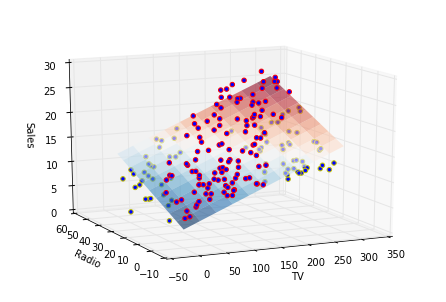

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# fit new OLS model with intercept on just TV and Radio
model_plt = smf.ols('Sales ~ TV + Radio', data=data)
results_plt = model_plt.fit()

# Create 3D plot - rectangular grid
x_plt = np.linspace(data['TV'].min(), data['TV'].max(), 100)
y_plt = np.linspace(data['Radio'].min(), data['Radio'].max(), 100)
xx1, xx2 = np.meshgrid(x_plt, y_plt) # xx1, xx2 = TV, Radio meshgrid

# hyperplane by evaluating the parameters on the grid
Z = results.params['Intercept'] + results.params['TV'] * xx1 + results.params['Radio'] * xx2

# Create matplotlib 3D axes
fig = plt.figure()
ax = Axes3D(fig, azim=-115, elev=15) # create 3D grid

# Plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, 
                       cmap=plt.cm.RdBu_r, 
                       alpha=0.6, linewidth=0)

# Plot data points
# points over the HP are red, points below are yellow
resid = data['Sales'] - results_plt.predict(data[['TV', 'Radio']])
ax.scatter(data[resid >= 0].TV, data[resid >= 0].Radio, data[resid >= 0].Sales, 
           color='red', alpha=1.0, facecolor='red')
ax.scatter(data[resid < 0].TV, data[['TV', 'Radio']][resid < 0].Radio, 
           data[resid < 0].Sales, color='y', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Compare Simple & Multiple Linear Regression Models
Do additional variables improve the fitting of the model (goodness of fit)

#### Simple Linear Regression Model

In [10]:
simp_model = smf.ols(formula='Sales ~ TV', data=data)
simp_results = simp_model.fit()
simp_results.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
simp_results.rsquared

0.61187505085007099

#### Multiple Linear Regression Model

In [12]:
results.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [13]:
results.rsquared

0.89721063817895219

The **multiple linear regression** model has a higher **R<sub>2</sub>** value, indicating that the model provides a better fit than a model only including the `TV` predictor variable alone.

`TV` advertisements accounts for some variation in `Sales`, but together with `Radio`, they both account for more variation.

## Hypothesis Testing
A hypothesis test is needed for *each* predictor variable (`x`).

### Model Equation
`y = 2.939 + β`<sub>TV</sub> `X`<sub>TV</sub> `+ β`<sub>Radio</sub> `X`<sub>Radio</sub> `+ β`<sub>Newspaper</sub>` X`<sub>Newspaper</sub>

`y = 2.939 + 0.0458 X`<sub>TV</sub> `+ 0.189 X`<sub>Radio</sub> `+ -0.001 X`<sub>Newspaper</sub>

##### Test 1: `X`<sub>TV</sub>
1) Hypothesis
  * **H<sub>0</sub>**: There is no effect of `TV` advertisements on `Sales`, controlling for `Radio` and `Newspaper` advertisements.
  * **H<sub>A</sub>**: There is an effect of `TV` advertisements on `Sales`, controlling for `Radio` and `Newspaper` advertisements.
  
2) Compute test-statistic & p-value
  * test-statistic: **slope** (β<sub>TV</sub>)

In [14]:
print "TV slope = %.3f" % results.params['TV']
print "TV p-value =", results.pvalues['TV']
print "95% CI = ", list(results.conf_int().loc['TV'])

TV slope = 0.046
TV p-value = 1.50995995481e-81
95% CI =  [0.043013711962401072, 0.048515578948394186]


3) Analyze the Results  
The **p-value** is large (p-val < 0.001), providing substantial evidence *against* H<sub>0</sub>. Additionally,  the **confidence interval** does not contain a slope (β<sub>TV</sub>) value of 0. The null hypothesis is *rejected* in favor of H<sub>A</sub>.

Thus, there's a *significant association* between `Sales` and `TV` advertisements, *controlling for all other advertisements*.

**Conclusion**: For each one unit increase in `TV` advertisements, the `Sales` of widgets increases by 0.046 (β<sub>TV</sub>).

##### Test 2: `X`<sub>Radio</sub>
1) Hypothesis
  * **H<sub>0</sub>**: There is no effect of `Radio` advertisements on `Sales`, controlling for `TV` and `Newspaper` advertisements.
  * **H<sub>A</sub>**: There is an effect of `Radio` advertisements on `Sales`, controlling for `TV` and `Newspaper` advertisements.
  
2) Compute test-statistic & p-value
  * test-statistic: **slope** (β<sub>Radio</sub>)

In [15]:
print "Radio slope = %.3f" % results.params['Radio']
print "Radio p-value =", results.pvalues['Radio']
print "95% CI = ", list(results.conf_int().loc['Radio'])

Radio slope = 0.189
Radio p-value = 1.50533892058e-54
95% CI =  [0.17154744744193365, 0.20551258639447487]


3) Analyze the Results
The **p-value** is small (p-val < 0.001), providing substantial evidence *against* H<sub>0</sub>. Additionally,  the **confidence interval** does not contain a slope (β<sub>Radio</sub>) value of 0. The null hypothesis is *rejected* in favor of H<sub>A</sub>.

Thus, there's a *significant association* between `Sales` and `Radio` advertisements, *controlling for `TV` advertisements*.

**Conclusion**: For each one unit increase in `Radio` advertisements, the `Sales` of widgets increases by 0.189 (β<sub>Radio</sub>), *controlling for `TV` advertisements*.

##### Test 3: `X`<sub>Newspaper</sub>
1) Hypothesis
  * **H<sub>0</sub>**: There is no effect of `Newspaper` advertisements on `Sales`, controlling for `TV` and `Radio` advertisements.
  * **H<sub>A</sub>**: There is an effect of `Newspaper` advertisements on `Sales`, controlling for `TV` and `Radio` advertisements.
  
2) Compute test-statistic & p-value
  * test-statistic: **slope** (β<sub>Newspaper</sub>)

In [16]:
print "Newspaper slope = %.3f" % results.params['Newspaper']
print "Newspaper p-value =", results.pvalues['Newspaper']
print "95% CI = ", list(results.conf_int().loc['Newspaper'])

Newspaper slope = -0.001
Newspaper p-value = 0.859915050081
95% CI =  [-0.012615953180255908, 0.010540967095303279]


3) Analyze the Results
The **p-value** is extremely large (p-val > 0.05), providing substantial evidence for H<sub>0</sub>. Additionally,  the **confidence interval** contains a slope (β<sub>newspaper</sub> value of 0. The null hypothesis is *failed to be rejected*.

Thus, there's no significant association between `Sales` and `Newspaper` advertisements, *controlling for other advertisements*.

**Conclusion**: There is no effect of `Newspaper` advertisements on the `Sales` of widgets. The difference or negative association (slope) is irrelevant and is due to chance.

## Feature Selection
How to decide **which features to include** in a linear regression model?
  * Try different models and only keep predictors in the model *if they have small p-values*.
  * Check whether **R<sup>2</sup>** value increases when adding new predictors (`x`).
  
What are the **drawbacks** to this approach?
  * **Linear models** rely upon a lot of assumptions (e.g. features being independent). If those assumptions are violated (*which they usually are*), **R<sup>2</sup>** and **p-values** are less reliable.
  * Using a **p-value** cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (*on average*) will still be counted as significant.
  * **R<sup>2</sup>** is susceptible to **overfitting**. Thus, there's no guarantee that a model with a high **R<sup>2</sup>** value will generalize.
  
##### Overfitting Example: Adding `Newspaper` predictor

In [17]:
# only include TV and Radio in the model
results_of1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
results_of1.rsquared

0.89719426108289568

In [18]:
# add Newspaper to the model (which we believe has no association with Sales)
results_of2 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
results_of2.rsquared

0.89721063817895219

**R<sup>2</sup>** will always increase as you *add more features* to the model, even if they are unrelated to the response. Thus, selecting the model with the highest **R<sup>2</sup>** is **not** a reliable approach for choosing the best linear model.

##### Alternative: `Adjusted R`<sup>2</sup>
**Adjusted R<sup>2</sup>** penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

##### Best Approach to Feature Selection: Cross-Validation
*So is there a better approach to feature selection?*  
**Cross-validation** provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Regression with Categorical Variables
Statistical learning or analysis may have variables that are not quantitative, but categorical (e.g. gender)

### Categorical Variables Handling in `StatsModels`
The formulaic interface of StatsModels relys on patsy formula parser.

Categorical variables can be encoded into `k-1` binary varia bles in StatsModels using the **`C()`** function. Doing so StatsModels knows to treat the feature as a categorical variable.
  * `C(famhist)`

#### Example: Chronic Heart Disease

Categorical Feature: `famhist`
  * if the patient has a family history of coronary artery disease

In [19]:
chd = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)
chd.index.name=None
chd.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Copy DataFrame and separate `predictors` and `response`

In [20]:
chd_X = chd.copy()
chd_y = chd_X.pop('chd') #.pop method return response and drops from DF
chd_X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49


Percentage of the response (`chd`) for patients with absent/present `famhist`)

In [21]:
chd_y.groupby(chd_X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

### Simple Linear Regression
Use the categorical variable as the sole predictor for the response.

#### Method 1: Convert Categorical variable to Numeric
`famhist` has 2 levels/categories, which have a natural ordering. Thus, allowing linear regression on the data *but only after converting the feature to numeric*.

##### Method: `pd.Categorical()`

In [22]:
chd['famhist_ord'] = pd.Categorical(chd.famhist).codes
chd.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_ord
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


In [23]:
smf.ols(formula="chd ~ famhist_ord", data=chd).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           2.66e-09
Time:                        18:34:59   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2370      0.028      8.489      0.000         0.182     0.292
famhist_ord     0.2630      0.043      6.071      0.000         0.178     0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Method 2: Raw Categorical Variable

In [24]:
smf.ols(formula="chd ~ C(famhist)", data=chd).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           2.66e-09
Time:                        18:34:59   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.2370      0.028      8.489      0.000         0.182     0.292
C(famhist)[T.Present]     0.2630      0.043      6.071      0.000         0.178     0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Conclusion
The small p-value (p-value < 0.05) and that the confidence interval does not contain a slope (β<sub>famhist</sub>) of 0 provides evidence *against* the H<sub>0</sub>. Thus, *rejecting* the H<sub>0</sub> in favor of H<sub>A</sub>.

There is a statistically significant association between `famhist` and `chd`. For a given `predictor`, being a patient with a `famhist` value of **Present** (1) is *associated with an average **increase** of CHD by 0.2630 (β<sub>famhist</sub>).

#### Category Variables Affect Interpretation of Results
β<sub>famhist</sub> = 0.2630

**`famhist` == Present (1)**
  * Being a patient with a value `Present` is associated with an average ***increase*** of β<sub>famhist</sub>.
  
**`famhist` == Absent (0)**
  * Being a patient with a value `Absent` is associated with an average ***decrease*** of β<sub>famhist</sub>.


# Logistic Regression

**Logistic Regression**: a form of (linear) regression used when the `dependent variable` (response) is *boolean/dichotomous*.   
  * **binary** or **multi-class** outcome
    * predict the *class* of an observation
    * predict the probability of *class ownership* (to map observation to class labels)
  * essentially a *generalization* of the linear regression model to classificaiton problems

Logistic regression model uses one or several **predictor variables** (`x`) that may be  *numerical* or *categorical* that predicts the probability of ocurrence of an event/class or predicts the class of an observation by *fitting the data to a **logit/logistic function**.

### Equation
**Raw**:  
`π = p(y=1/x) = (e`<sup>β<sub>0</sub>+β<sub>1</sub>x</sup>`) / (1 + e`<sup>β<sub>0</sub>+β<sub>1</sub>x</sup>`)`

**y=mx+b**:  
`log o = β`<sub>0</sub>` + β`<sub>1</sub>X<sub>1</sub>` + ... + β`<sub>n</sub>X<sub>n</sub> 

Variables
  * `o`: *odds* in favor of a particular outcome/class

**Note**: The Logistic Regression equation (odds) is equivalent to the logarithm of a Linear regression equation.  

### Problem Types
|| Continuous | Categorical |
|:--|:--:|:--:|
|**Supervised**| Regression | **Classification** |
|**Unsupervised**| Dimension Reduction | Clustering |

Logistic regression is associated as a **classification** problem.

### Logistic vs. Linear Regression

#### Issues: Applying Linear Regression on a Classification Problem
*Why can't you just apply linear regression (using OLS) and encode the classes/dependent variable numerically* (e.g. binary is simply numerically 0 and 1)?  

*Problems*:
  * The model produces predictions (`y`) that are hard to interpret. For example, estimated parameters and values for `x` may have the model predict `y=0.5`.
    * only meaningful values of `y` are 0 and 1 (classes)
    * tempting to interpret the result as a probability (e.g. the respondent/observation has a 50% chance of being classified as `class 1`)
    * `y` may have values of 1.1 or -0.1, which are not valid probabilities

**Solution**: Logistic Regression
Logistic regression avoids this problem by expressing predictions in terms of **odds** *rather than probabilities*.

#### Odds
*Odds vs. Probabilities*
**Odds** and **probabilities** are different representations of the *same info*.

**Odds** of an event/class are given by the ratio of the probability of the event by its completement.  

*Example*: Probability of 75% can be represented in **odds** as 3 to 1 (**3:1**).
  * The probability of class/event `1` is 3 times the probability of class `0`.

##### Conversion between Odds & Probabilities
1. Odds from Probability:  
`o = p / (1-p)`
2. Probability from Odds:  
`o = np.exp(log_o)` (log o logistic regression equation)  
`p = o / (o+1)` 

#### Interpretation of Model Coefficients (β<sub>x</sub>)
*Linear Regression*: β<sub>x</sub> represents the change in the `response` for a unit change in `x`.  
*Logistic Regression*: β<sub>x</sub> represents the change in ***log-odds*** for a unit change in `x`
  * e<sup>β</sup> represents the change in **odds** for a unit change in `x`.

## Estimating Model Parameters
Unlike linear regression, **logistic regression** does not have a closed form solution. Problems are typically solved by *guessing an initial solution and improving it iteratively*.

**Goal**: Find the **maximum-likelihood estimate (MLE)**.
  * **MLE**: the set of parameters that *maximizes the likelihood of the data*

#### Example
Given the following data and the initial guesses of the parameters:
  * β<sub>0</sub> = -1.5
  * β<sub>1</sub> = 2.8
  * β<sub>2</sub> = 1.1 
  
Equation:  **`log o = -1.5 + 2.8 X`<sub>1</sub>` + 1.1 X`<sub>2</sub>**

In [25]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

In [26]:
beta = [-1.5, 2.8, 1.1]

Compute `log_0`

In [27]:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Convert from `log odds` to probabilities.

In [28]:
o = np.exp(log_o)
o

array([  0.22313016,   0.67032005,   0.67032005,  11.02317638])

In [29]:
p = o / (o + 1)
p

array([ 0.18242552,  0.40131234,  0.40131234,  0.9168273 ])

##### Conclusions
  * when `log_o` > 0:
    * `o` > 1
    * `p` > 0.5

The **likelihood of an outcome** is `p` when y == `1` and 1-p when y == `0`

For example, if the probability of class `1` is 0.8. The *likelihood* of outcome `1` is 0.8 and outcome `0` is 0.2.

In [30]:
likes = y * p + (1-y) * (1-p)
likes

array([ 0.81757448,  0.40131234,  0.59868766,  0.9168273 ])

The *overall likelihood* of the data is the product of `likes`:

In [31]:
like = np.prod(likes)
like

0.18009335296730339

## Computation
### StatsModels Package: `logit`
`statsmodels.formula.api.logit()`

`logit` function converts from probability to log odds.

**Note**: Function requqires the `dependent variable` to be *binary* as opposed to *boolean*.
  * convert column to `int` using `pd.astype(int)`
  
Attributes:
  * `endog`: endogenous variables (dependent variables)
  * `exog`: exogenous variables (explanatory variables)

### Example: NSFG - Sex Ratio

**Predictor Variables**  

Factors found to affect sex ratio include parents' age, birth order, race, and social status.

In [32]:
import nsfg
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

df_sex = live[live.prglngth>30]

# Convert dependent variable
df_sex['boy'] = (df_sex.babysex==1).astype(int)

C:\Users\Calvin\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Model

In [33]:
log_model_age = smf.logit(formula='boy ~ agepreg', data=df_sex)
age_results = log_model_age.fit()
age_results.summary()

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8882
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Mar 2017   Pseudo R-squ.:               6.144e-06
Time:                        18:35:03   Log-Likelihood:                -6156.7
converged:                       True   LL-Null:                       -6156.8
                                        LLR p-value:                    0.7833
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0058      0.098      0.059      0.953        -0.185     0.197
agepreg        0.0010      0.004      0.275      0.783        -0.006     0.009
==============================================================================
"""

In [34]:
print age_results.params
print 
print age_results.pvalues

Intercept    0.005786
agepreg      0.001049
dtype: float64

Intercept    0.952696
agepreg      0.783272
dtype: float64


##### Conclusion
**β<sub>agepreg</sub>** is positive, suggesting that older mothers are more likely to have boys.

Yet the **p-value** of 0.783 indicates that the apparent effect could be easily due to chance.

In [35]:
f_sex = 'boy ~ agepreg + hpagelb + birthord + C(race)'
log_model = smf.logit(formula=f_sex, data=df_sex)
sex_results = log_model.fit()
sex_results.summary()

Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8782
Model:                          Logit   Df Residuals:                     8776
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Mar 2017   Pseudo R-squ.:               0.0001440
Time:                        18:35:03   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -6086.3
                                        LLR p-value:                    0.8822
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.0301      0.104     -0.290      0.772        -0.234     0.173
C(race)[T.2]    -0.0224      0.051     -0.439      0.660        -0.122     0.077
C(race)[T.3]    -0.0005      0.083     -0.005      0.996        -0.163     0.162
agepreg         -0.0027      0.006     -0.484      0.629        -0.014     0.008
hpagelb          0.0047      0.004      1.112      0.266        -0.004     0.013
birthord         0.0050      0.022      0.227      0.821        -0.038     0.048
================================================================================
"""

In [36]:
print "slope:"
print sex_results.params
print "\n p-values:"
print sex_results.pvalues

slope:
Intercept      -0.030133
C(race)[T.2]   -0.022382
C(race)[T.3]   -0.000457
agepreg        -0.002673
hpagelb         0.004703
birthord        0.005007
dtype: float64

 p-values:
Intercept       0.771694
C(race)[T.2]    0.660437
C(race)[T.3]    0.995612
agepreg         0.628641
hpagelb         0.266229
birthord        0.820617
dtype: float64


##### Conclusions
None of the estimated parameters are statistically significant. The **pseudo-R<sup>2</sup>** value is slightly higher for multiple logistic regression, but that could be due to chance.

## Goodness of Fit
**R<sup>2</sup>** does not apply to logistic regression.

Alternatives:
  * pseudo R<sup>2</sup> values

## Accuracy of Model
Accuracy of the model is the number of successful predictions compared to what we would expect by chance.

To make a prediction, we must extract the exogenous and endogenous variables.

In [37]:
endog = pd.DataFrame(log_model.endog, 
                     columns = [log_model.endog_names])
exog = pd.DataFrame(log_model.exog, 
                    columns = [log_model.exog_names])

#### Baseline Prediction Strategy
Baseline strategy is to guess "boy" everytime time since the NSFG data has more boys than girls. The accuracy of this strategy is just the fraction of boys.

In [38]:
actual = endog['boy']
baseline = actual.mean()
baseline

0.50717376451833296

`actual` is encoded in binary integers, the mean is the fraction of boys (0.507).

Thus, we're right almost 51% of the time with this guess

#### Model Accuracy Strategy
Use logistic regression model to compute the number of predictions that are correct.

In [39]:
predict = (sex_results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

`results.predict` returns a NumPy array of probabilities, which are rounded off to `0` or `1`. Multiplying by `actual` yields 1 if we predict a `boy` aand get it right, `0` otherwise.
  * `true_pos` indicates **true positives**
  * `true_neg` indicates the cases where we guess `girl` and get it right

**Accuracy** is the fraction of correct guesses
`acc = (sum(true_pos) + sum(true_neg)) / len(actual)`

In [40]:
acc = (np.sum(true_pos) + np.sum(true_neg)) / len(actual)
acc

0.51150079708494645

This result has a slightly superior strategy than the baseline (0.512 versus 0.507).

## Hypothesis Test

1) Hypothesis
  * **H<sub>0</sub>**: There is no effect of `agepreg` on the sex of the baby being male (`Boy`). (β<sub>1</sub> = 0)
  * **H<sub>A</sub>**: There is qn effect of `agepreg` on the sex of the baby being male (`Boy`). (β<sub>1</sub> ≠ 0)
  
Predictors (`x`)
  * `agepreg` (continuous)

Response (`y)
  * `Boy` (dichotomous)
     * `1`: boy
     * `0`: girl
  
2) Compute test-statistic & p-value
  * test-statistic: **slope** (β<sub>1</sub>)

In [43]:
log_model_age = smf.logit(formula='boy ~ agepreg', data=df_sex)
age_results = log_model_age.fit()

print "slope = %.3f" % age_results.params['agepreg']
print "p-value = %.3f" % age_results.pvalues['agepreg']
print "95% CI = ", list(age_results.conf_int().loc['agepreg'])

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
slope = 0.001
p-value = 0.783
95% CI =  [-0.0064241089080019614, 0.0085215537466830638]


In [45]:
odds_ratio = np.exp(age_results.params['agepreg'])
odds_ratio

1.0010492725209814

**Odds Ratio**
`1`: boy
`0`: girl

The odds ratio states thatthe odds of the newborn being a boy is 1.001 to 1.

`Odds Ratio = e<sup>β<sub>1</sub>`

3.) Analyze the Results  

The test-statistic (**β<sub>1</sub>**) is 0.001 and the confidence interval does not contain a slope value of 0. Despite this, the **p-value** is large (p-value > 0.05), not providing evidence against H<sub>0</sub>. Thus, the null hypothesis is not rejected. There is no significant effect of `agepreg` on the sex of the baby being a boy.

**Conclusion**:  
**β<sub>agepreg</sub>** is positive, suggesting that older mothers are more likely to have boys. More specifically, for every one unit increase in `agepreg`, the estimated log(odds) increases by 0.001 units.

In terms of the **odds ratio**, the odds that a newborn baby will be a boy compared to those being a girl is 1.001 to 1.

Yet the **p-value** of 0.783 indicates that the apparent effect could be easily due to chance.